# K-Means Clustering

## Importing the libraries

In [237]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [238]:
dataset = pd.read_csv('Adidas Vs Nike.csv')
dataset.loc[dataset ["Brand"] == "Adidas ORIGINALS", "Brand"] = "1"
dataset.loc[dataset ["Brand"] == "Adidas CORE / NEO", "Brand"] = "1"
dataset.loc[dataset ["Brand"] == "Adidas Adidas ORIGINALS", "Brand"] = "1"
dataset.loc[dataset ["Brand"] == "Adidas SPORT PERFORMANCE", "Brand"] = "1"
dataset.loc[dataset ["Brand"] == "Nike", "Brand"] = "2"





X = dataset[["Rating","Reviews","Brand"]]

In [239]:
X

,Rating,Reviews,Brand
0,4.8,41,1
1,3.3,24,1
2,2.6,37,1
3,4.1,35,1
4,3.5,72,1
...,...,...,...
3263,5.0,1,2
3264,0.0,0,2
3265,5.0,1,2
3266,4.0,4,2


In [240]:
dataset.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,1,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,1,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,1,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,1,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,1,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


## Using the elbow method to find the optimal number of clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

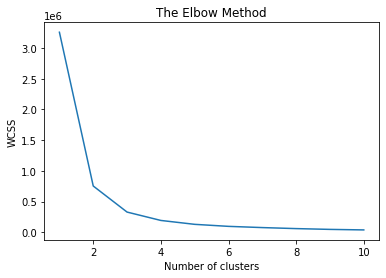

In [241]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [242]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [243]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

## Visualising the clusters

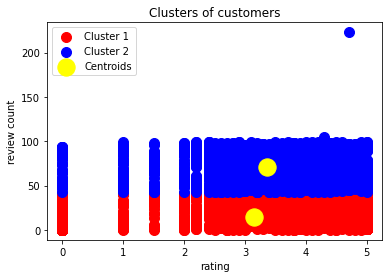

In [244]:
plt.scatter(X[y_kmeans == 0]['Rating'], X[y_kmeans == 0]['Reviews'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['Rating'], X[y_kmeans == 1]['Reviews'], s = 100, c = 'blue', label = 'Cluster 2')



plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('rating')
plt.ylabel('review count')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

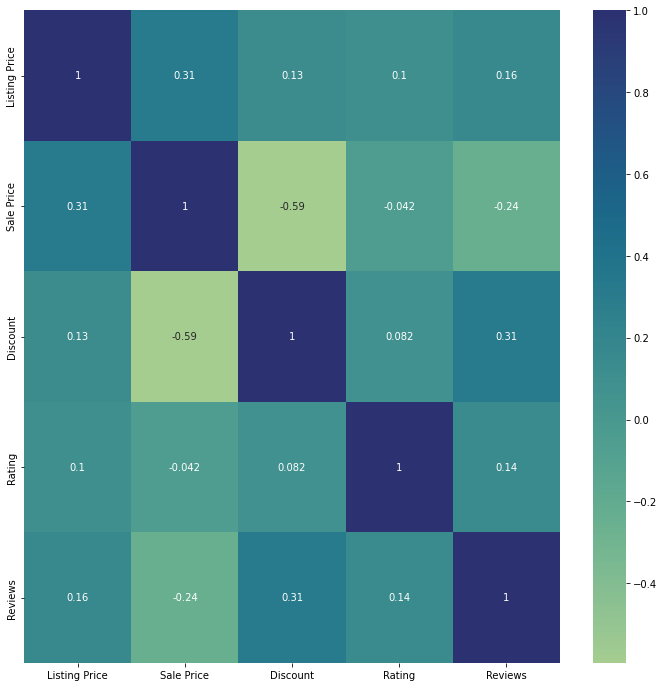

In [245]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(),annot = True,cmap="crest")
plt.show